#Q2

In [1]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

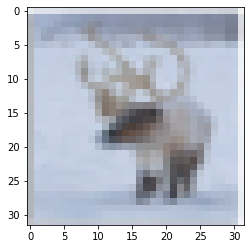

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(128, activation='relu'))
fc_model.add(keras.layers.Dense(128, activation='relu'))
fc_model.add(keras.layers.Dense(256, activation='relu'))
fc_model.add(keras.layers.Dense(256, activation='relu'))
fc_model.add(keras.layers.Dense(num_classes, activation='softmax'))
# Add Flatten layer and few Dense layers
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 511,242
Trainable params: 511,242
Non-trai

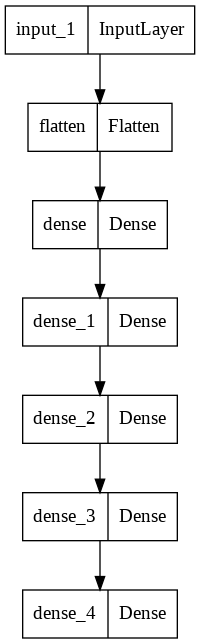

In [7]:
plot_model(fc_model)

In [8]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
Conv_model.add(keras.layers.ZeroPadding2D((1,1)))
Conv_model.add(keras.layers.Conv2D(16, (5,5), strides =(1, 1), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D((2,2), strides =(2, 2), padding='same'))
Conv_model.add(keras.layers.ZeroPadding2D((1,1)))
Conv_model.add(keras.layers.Conv2D(32, (5,5), strides =(1, 1), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D((2,2), padding='same'))
Conv_model.add(keras.layers.ZeroPadding2D((1,1)))
Conv_model.add(keras.layers.Conv2D(64, (5,5), strides =(1, 1), activation='relu'))
Conv_model.add(keras.layers.MaxPool2D((2,2), padding='same'))
Conv_model.add(keras.layers.ZeroPadding2D((1,1)))
Conv_model.add(keras.layers.Conv2D(64, (5,5), strides =(1, 1), activation='relu', padding='same'))
Conv_model.add(keras.layers.MaxPool2D((2,2), padding='same'))
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(128, activation='relu'))
Conv_model.add(keras.layers.Dense(num_classes, activation='softmax'))
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 34, 34, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 17, 17, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        12832     
                                                      

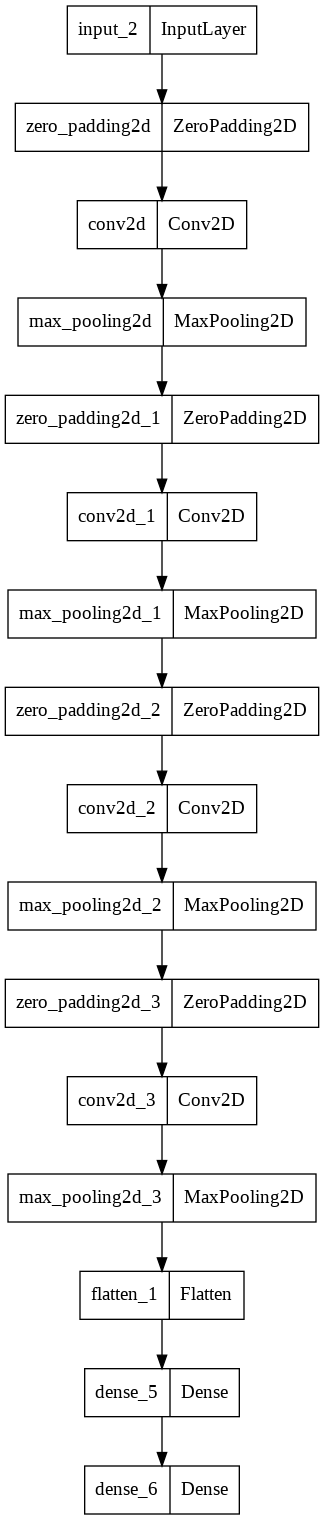

In [9]:
plot_model(Conv_model)

In [10]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=15)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/15
1563/1563 [==============================] - 7s 3ms/step - loss: 1.9001 - accuracy: 0.3019
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7746 - accuracy: 0.3568
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7345 - accuracy: 0.3708
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7076 - accuracy: 0.3847
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6939 - accuracy: 0.3876
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6817 - accuracy: 0.3918
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6710 - accuracy: 0.3931
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6548 - accuracy: 0.3987
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6510 - accuracy: 0.4036
Epoch 10/15
1563/1563 [==============================] - 6s 

#Q3

In [11]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [12]:
!rm -r sample_data

In [13]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:13<00:00, 41.7MB/s]


In [14]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [15]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [16]:
def resize_img(img, desired_size = 224):
    # write your code here
    new_img = img
    num = desired_size / max(img.shape[0], img.shape[1])
    ww = int(img.shape[1] * num)
    hh = int(img.shape[0] * num)
    new_img = cv2.resize(new_img, (ww, hh))
    border1, border2, border3 = np.int64(np.divide(np.subtract(desired_size, new_img.shape), 2))
    i, j, k = np.mod(new_img.shape, 2)
    new_img = cv2.copyMakeBorder(new_img, top= border1 + i, bottom = border1, left = border2, right = border2 + j, borderType = cv2.BORDER_CONSTANT)
    return new_img

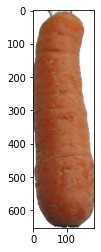

In [17]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

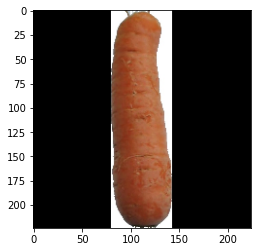

In [18]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [19]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [ ]:
# YOU CAN CHANGE IT
EPOCHS = 20

In [20]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.add(tf.keras.applications.ResNet50(include_top = False, weights = None, pooling = 'avg'))
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(512, activation='relu'))
resnet.add(keras.layers.Dense(train_generator.num_classes, activation='softmax'))
resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 24)                12312     
                                                                 
Total params: 24,649,112
Trainable params: 24,595,992
Non-trainable params: 53,120
_________________________________________________________________


In [21]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [28]:
resnet.fit(train_generator, epochs=20)

Epoch 1/20
65/65 [==============================] - 67s 1s/step - loss: 0.2305 - acc: 0.9246
Epoch 2/20
65/65 [==============================] - 65s 1s/step - loss: 0.1591 - acc: 0.9498
Epoch 3/20
65/65 [==============================] - 65s 996ms/step - loss: 0.1298 - acc: 0.9607
Epoch 4/20
65/65 [==============================] - 65s 1000ms/step - loss: 0.0632 - acc: 0.9820
Epoch 5/20
65/65 [==============================] - 66s 1s/step - loss: 0.0538 - acc: 0.9838
Epoch 6/20
65/65 [==============================] - 65s 999ms/step - loss: 0.0911 - acc: 0.9724
Epoch 7/20
65/65 [==============================] - 65s 997ms/step - loss: 0.0486 - acc: 0.9852
Epoch 8/20
65/65 [==============================] - 65s 998ms/step - loss: 0.0415 - acc: 0.9865
Epoch 9/20
65/65 [==============================] - 66s 1s/step - loss: 0.0369 - acc: 0.9921
Epoch 10/20
65/65 [==============================] - 65s 996ms/step - loss: 0.0462 - acc: 0.9857
Epoch 11/20
65/65 [==============================]

## C : Fine-tune Resnet50 on fruits dataset.

In [29]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
res_orig = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', pooling = 'avg')
fine_tune_resnet.add(res_orig)
fine_tune_resnet.add(keras.layers.Flatten())
fine_tune_resnet.add(keras.layers.Dropout(0.55))
fine_tune_resnet.add(keras.layers.Dense(512, activation='relu'))
fine_tune_resnet.add(keras.layers.Dense(train_generator.num_classes, activation='softmax'))
res_orig.trainable = False
fine_tune_resnet.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               1049088   
                                                                 
 dense_12 (Dense)            (None, 24)                12312     
                                                                 
Total params: 24,649,112
Trainable params: 1,061,400
Non-trainable params: 23,587,712
_________________________________________________________________


In [30]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [31]:
fine_tune_resnet.fit(train_generator, epochs=20)

Epoch 1/20
65/65 [==============================] - 36s 508ms/step - loss: 3.0128 - acc: 0.1218
Epoch 2/20
65/65 [==============================] - 35s 528ms/step - loss: 2.4710 - acc: 0.2462
Epoch 3/20
65/65 [==============================] - 36s 549ms/step - loss: 2.0656 - acc: 0.3450
Epoch 4/20
65/65 [==============================] - 36s 542ms/step - loss: 1.7353 - acc: 0.4462
Epoch 5/20
65/65 [==============================] - 37s 564ms/step - loss: 1.5327 - acc: 0.5014
Epoch 6/20
65/65 [==============================] - 37s 562ms/step - loss: 1.3551 - acc: 0.5579
Epoch 7/20
65/65 [==============================] - 37s 562ms/step - loss: 1.2477 - acc: 0.5843
Epoch 8/20
65/65 [==============================] - 36s 547ms/step - loss: 1.1750 - acc: 0.6012
Epoch 9/20
65/65 [==============================] - 35s 536ms/step - loss: 1.1000 - acc: 0.6312
Epoch 10/20
65/65 [==============================] - 37s 562ms/step - loss: 1.0143 - acc: 0.6548
Epoch 11/20
65/65 [====================

## Test models

In [32]:
resnet.evaluate(test_generator)

33/33 [==============================] - 18s 520ms/step - loss: 26.6302 - acc: 0.0260


[26.630224227905273, 0.026045016944408417]

In [33]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 18s 508ms/step - loss: 0.4166 - acc: 0.8714


[0.4166014790534973, 0.8713826537132263]